In [1]:
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [3]:
df = pd.read_excel("./data/Quiz1-Student Version_Questions2,4,5,6_Main_Dataset.xlsx")

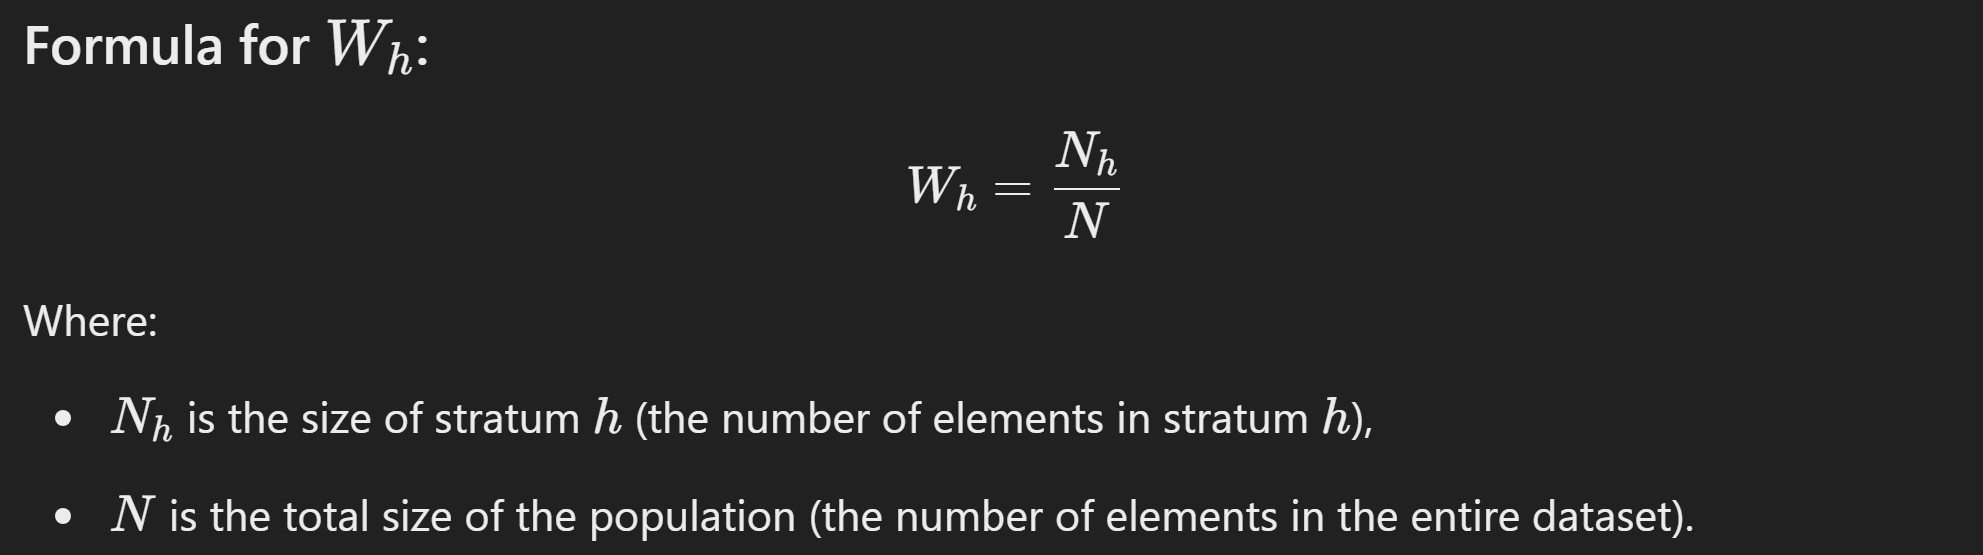

In [4]:
# Calculate the total population size
N = len(df)

# Group by Stratum
strata_group = df.groupby('Stratum')

# Compute the mean and size for each stratum
stratum_means = strata_group['Corruption level Rating Score (0-100)'].mean()
stratum_sizes = strata_group.size()

# Compute the weight for each stratum (Wh)
stratum_weights = stratum_sizes / N

# Output results
print(f"Stratum Weights (W_h):\n{stratum_weights}")

Stratum Weights (W_h):
Stratum
Central Asia     0.25
Europe           0.25
North America    0.25
South America    0.25
dtype: float64


In [5]:
#4.2
print("Compute a mean:", df['Corruption level Rating Score (0-100)'].mean().round(2))

Compute a mean: 52.28


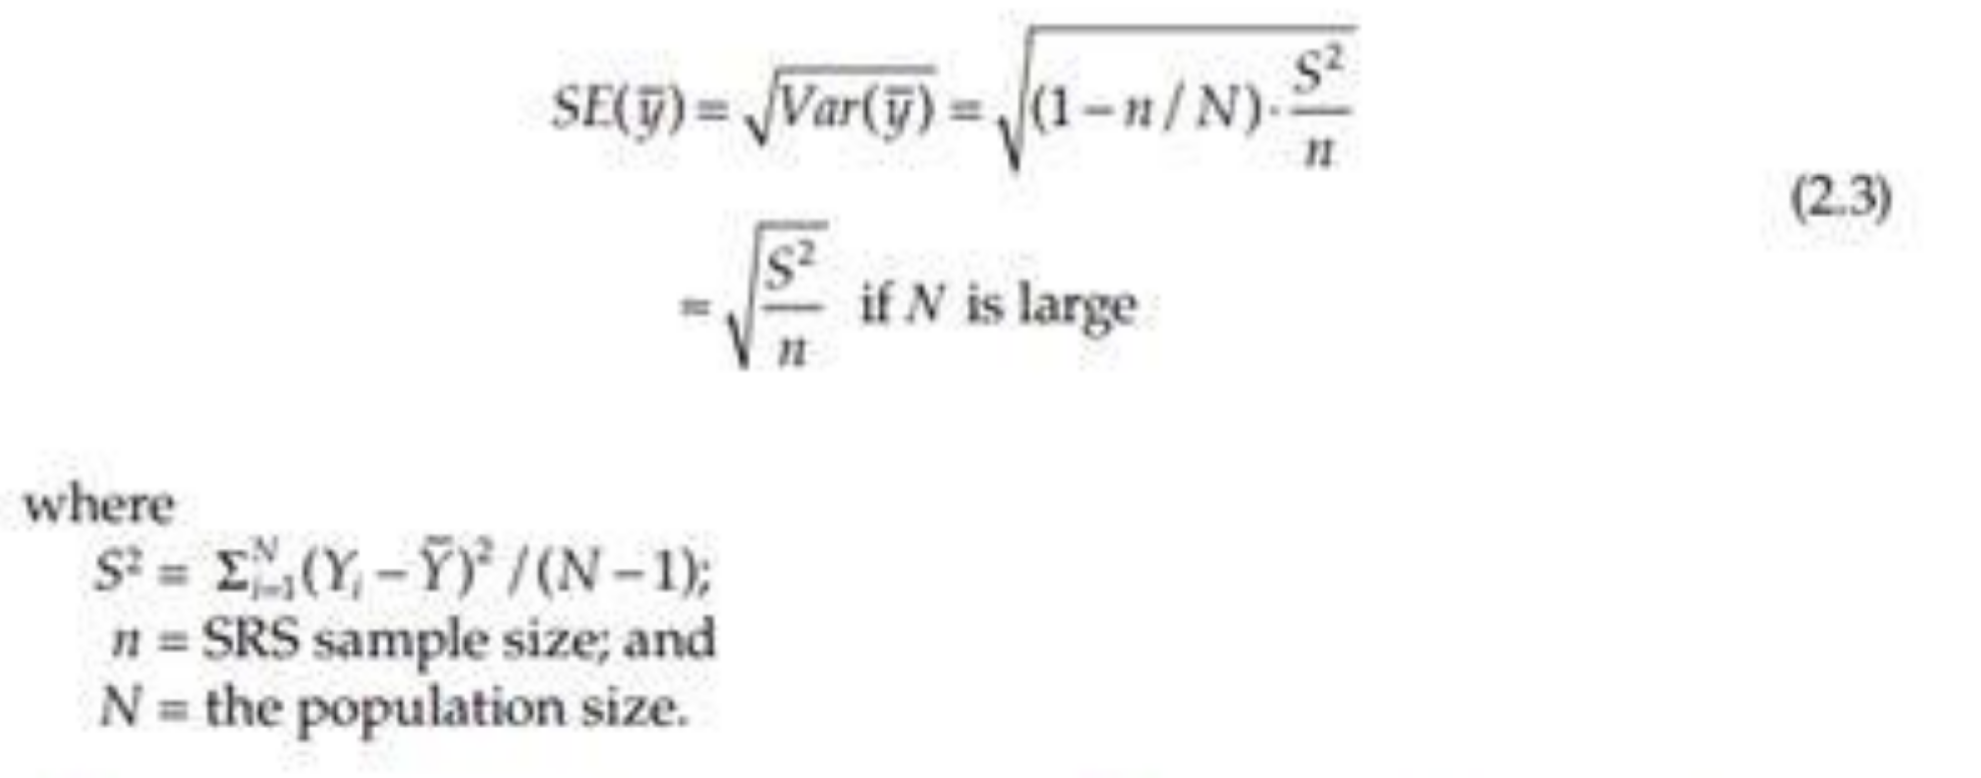

In [18]:
df['Y'] = (df['Corruption level Rating Score (0-100)']-52.28)**2

stratums = df['Stratum'].unique()
sh_values = {}

for stratum in stratums:
    sh_values[stratum] = df[df['Stratum'] == stratum]['Y'].sum() / float(len(df[df['Stratum'] == stratum]['Y']) - 1)

#4.3
import math
standart_strat = math.sqrt(((0.25**2*sh_values['North America']/8)+
                            (0.25**2*sh_values['South America']/8)+
                            (0.25**2*sh_values['Europe']/8)+
                            (0.25**2*sh_values['Central Asia']/8)))

print("Compute a standard error for Stratified part:", round(standart_strat, 2))

Compute a standard error for Stratified part: 4.28


In [19]:
#4.4
standart_error_srs = df['Corruption level Rating Score (0-100)'].sem()
d = round(standart_strat / standart_error_srs, 2)
print("Compute d-value:", d)

Compute d-value: 1.05


In [23]:
#4.5
d_squared = round(d*d, 2)
print("Compute d-squared:", d_squared)

Compute d-squared: 1.1


In [ ]:
#4.6
neff = round(32/(d_squared), 2)
print("Compute Neff:", neff)

Compute Neff: 29.09
